In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
!pip install folium
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
! pip install category_encoders
import category_encoders as ce
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


Step 1: Data Loading and Exploration

This step involves loading your dataset into a pandas DataFrame and exploring the initial rows to get a sense of the data. It also helps in identifying any missing values and understanding the data types of each column.

Step 2: Data Preprocessing

In this step, we convert the date columns to the datetime data type, extract useful information like year, month, and day, and handle missing values if necessary. We can apply additional preprocessing steps based on the specific requirements of your analysis.

Step 3: Exploratory Data Analysis (EDA)

In this step, we perform exploratory data analysis to gain insights into the dataset. We created various visualizations using libraries like Matplotlib and Seaborn to understand the distribution of variables and relationships between different features.

These initial steps provide a foundation for our project. From here, we can move on to more advanced analyses, feature engineering, and model implementation as outlined in our project plan.

In [ ]:
# read the data
file_path = 'Traffic_Collision_Data_from_2010_to_Present.csv'
df = pd.read_csv(file_path)
df.shape
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599479 entries, 0 to 599478
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DR Number               599479 non-null  int64  
 1   Date Reported           599479 non-null  object 
 2   Date Occurred           599479 non-null  object 
 3   Time Occurred           599479 non-null  int64  
 4   Area ID                 599479 non-null  int64  
 5   Area Name               599479 non-null  object 
 6   Reporting District      599479 non-null  int64  
 7   Crime Code              599479 non-null  int64  
 8   Crime Code Description  599479 non-null  object 
 9   MO Codes                512315 non-null  object 
 10  Victim Age              513666 non-null  float64
 11  Victim Sex              589428 non-null  object 
 12  Victim Descent          588485 non-null  object 
 13  Premise Code            598520 non-null  float64
 14  Premise Description 

DR Number Date Reported Date Occurred  Time Occurred  Area ID   Area Name  \
0  190319651    08/24/2019    08/24/2019            450        3   Southwest   
1  190319680    08/30/2019    08/30/2019           2320        3   Southwest   
2  190413769    08/25/2019    08/25/2019            545        4  Hollenbeck   
3  190127578    11/20/2019    11/20/2019            350        1     Central   
4  190319695    08/30/2019    08/30/2019           2100        3   Southwest   

   Reporting District  Crime Code Crime Code Description  \
0                 356         997      TRAFFIC COLLISION   
1                 355         997      TRAFFIC COLLISION   
2                 422         997      TRAFFIC COLLISION   
3                 128         997      TRAFFIC COLLISION   
4                 374         997      TRAFFIC COLLISION   

                             MO Codes  Victim Age Victim Sex Victim Descent  \
0            3036 3004 3026 3101 4003        22.0          M              H   
1  3037 3006 3028 3030 3039 3101 4003        30.0          F              H   
2            3101 3401 3701 3006 3030         NaN          M              X   
3       0605 3101 3401 3701 3011 3034        21.0          M              H   
4       0605 4025 3037 3004 3025 3101        49.0          M              B   

   Premise Code Premise Description                          Address  \
0         101.0              STREET  JEFFERSON                    BL   
1         101.0              STREET  JEFFERSON                    BL   
2         101.0              STREET                      N  BROADWAY   
3         101.0              STREET                              1ST   
4         101.0              STREET            MARTIN LUTHER KING JR   

                         Cross Street              Location  
0     NORMANDIE                    AV  (34.0255, -118.3002)  
1                          W  WESTERN  (34.0256, -118.3089)  
2  W  EASTLAKE                     AV  (34.0738, -118.2078)  
3                             CENTRAL  (34.0492, -118.2391)  
4     ARLINGTON                    AV  (34.0108, -118.3182)

In [ ]:
# Process excisting data and add additional columns

df['Year'] = pd.DatetimeIndex(df['Date Occurred']).year
df['Month'] = pd.DatetimeIndex(df['Date Occurred']).month
df['Day'] = pd.DatetimeIndex(df['Date Occurred']).day
df['Week'] = pd.DatetimeIndex(df['Date Occurred']).week
df['Weekday'] = pd.DatetimeIndex(df['Date Occurred']).weekday

def hour(x):
    x=x//100
    return (x)

df["Hour"]=df["Time Occurred"].apply(hour)

df.head()

<ipython-input-6-7194aaadcf33>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = pd.DatetimeIndex(df['Date Occurred']).week


DR Number Date Reported Date Occurred  Time Occurred  Area ID   Area Name  \
0  190319651    08/24/2019    08/24/2019            450        3   Southwest   
1  190319680    08/30/2019    08/30/2019           2320        3   Southwest   
2  190413769    08/25/2019    08/25/2019            545        4  Hollenbeck   
3  190127578    11/20/2019    11/20/2019            350        1     Central   
4  190319695    08/30/2019    08/30/2019           2100        3   Southwest   

   Reporting District  Crime Code Crime Code Description  \
0                 356         997      TRAFFIC COLLISION   
1                 355         997      TRAFFIC COLLISION   
2                 422         997      TRAFFIC COLLISION   
3                 128         997      TRAFFIC COLLISION   
4                 374         997      TRAFFIC COLLISION   

                             MO Codes  ...  Premise Description  \
0            3036 3004 3026 3101 4003  ...               STREET   
1  3037 3006 3028 3030 3039 3101 4003  ...               STREET   
2            3101 3401 3701 3006 3030  ...               STREET   
3       0605 3101 3401 3701 3011 3034  ...               STREET   
4       0605 4025 3037 3004 3025 3101  ...               STREET   

                           Address                        Cross Street  \
0  JEFFERSON                    BL     NORMANDIE                    AV   
1  JEFFERSON                    BL                          W  WESTERN   
2                      N  BROADWAY  W  EASTLAKE                     AV   
3                              1ST                             CENTRAL   
4            MARTIN LUTHER KING JR     ARLINGTON                    AV   

               Location  Year Month Day Week  Weekday  Hour  
0  (34.0255, -118.3002)  2019     8  24   34        5     4  
1  (34.0256, -118.3089)  2019     8  30   35        4    23  
2  (34.0738, -118.2078)  2019     8  25   34        6     5  
3  (34.0492, -118.2391)  2019    11  20   47        2     3  
4  (34.0108, -118.3182)  2019     8  30   35        4    21  

[5 rows x 24 columns]

In [ ]:
# 'N', 'H', 'X' values are present.  Will remove all from the feature for Victim Sex except M and F
df = df[(df['Victim Sex'] == 'M') | (df['Victim Sex'] == 'F')]
# Drop rows with NaN values in the 'Victim Age' column
df = df.dropna(subset=['Victim Age'])
#removing outlier
df=df[df['Victim Age'] != 99]

In [ ]:
# Group by 'Year' and count the number of occurrences
data_per_year = df.groupby('Year').size().reset_index(name='Count')

# Print or display the result
print(data_per_year)

    Year  Count
0   2010  37124
1   2011  37592
2   2012  37704
3   2013  36796
4   2014  38625
5   2015  42338
6   2016  46275
7   2017  47336
8   2018  47353
9   2019  49099
10  2020  36666
11  2021  15853
12  2022  13645
13  2023  11293


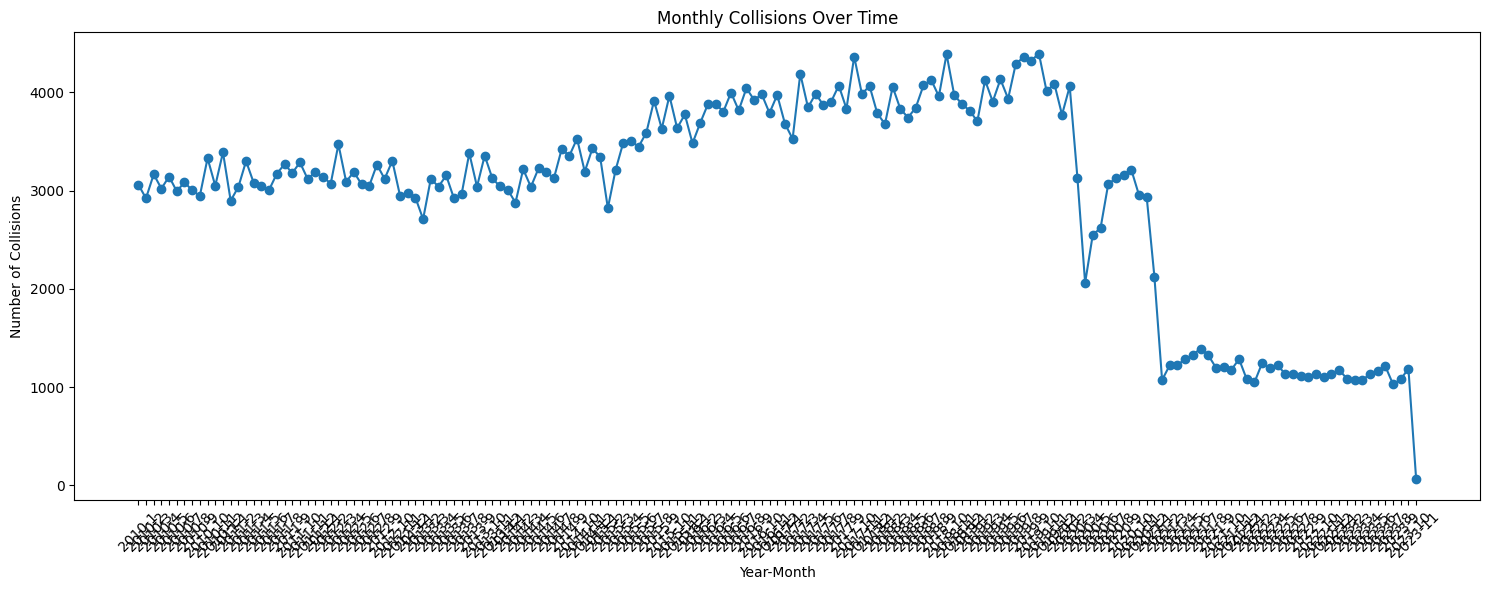

In [ ]:
# Group the data by year and month
grouped_data = df.groupby(['Year', 'Month']).size().reset_index(name='num_collisions')

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(grouped_data['Year'].astype(str) + '-' + grouped_data['Month'].astype(str), grouped_data['num_collisions'], marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Number of Collisions')
plt.title('Monthly Collisions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

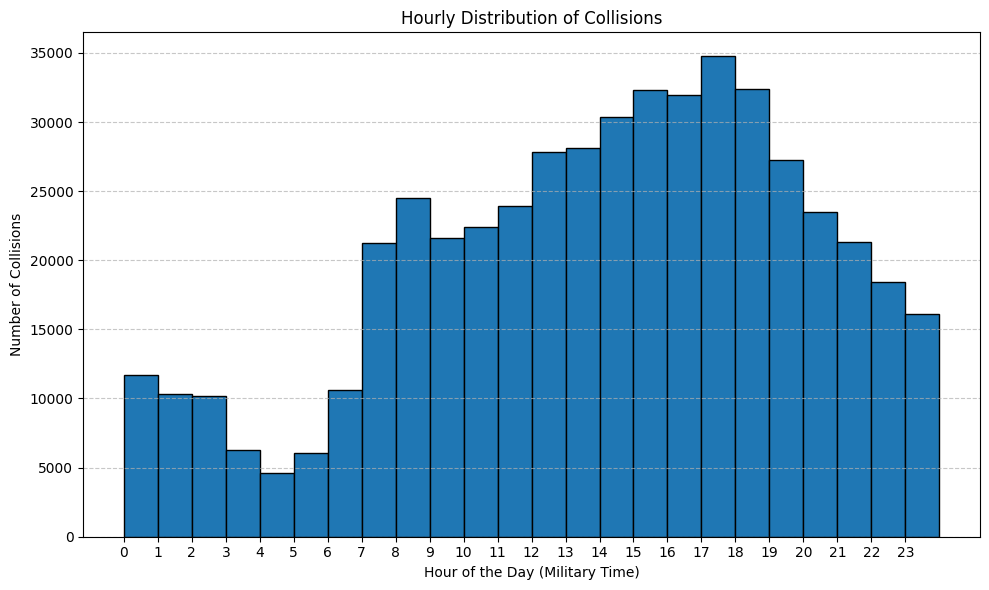

In [ ]:
# Plot the histogram of collisions based on time
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, range=(0, 24), edgecolor='black')  # Using 24 bins for 24 hours
plt.xlabel('Hour of the Day (Military Time)')
plt.ylabel('Number of Collisions')
plt.title('Hourly Distribution of Collisions')
plt.xticks(range(0, 24))  # Setting x-axis ticks for 24 hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

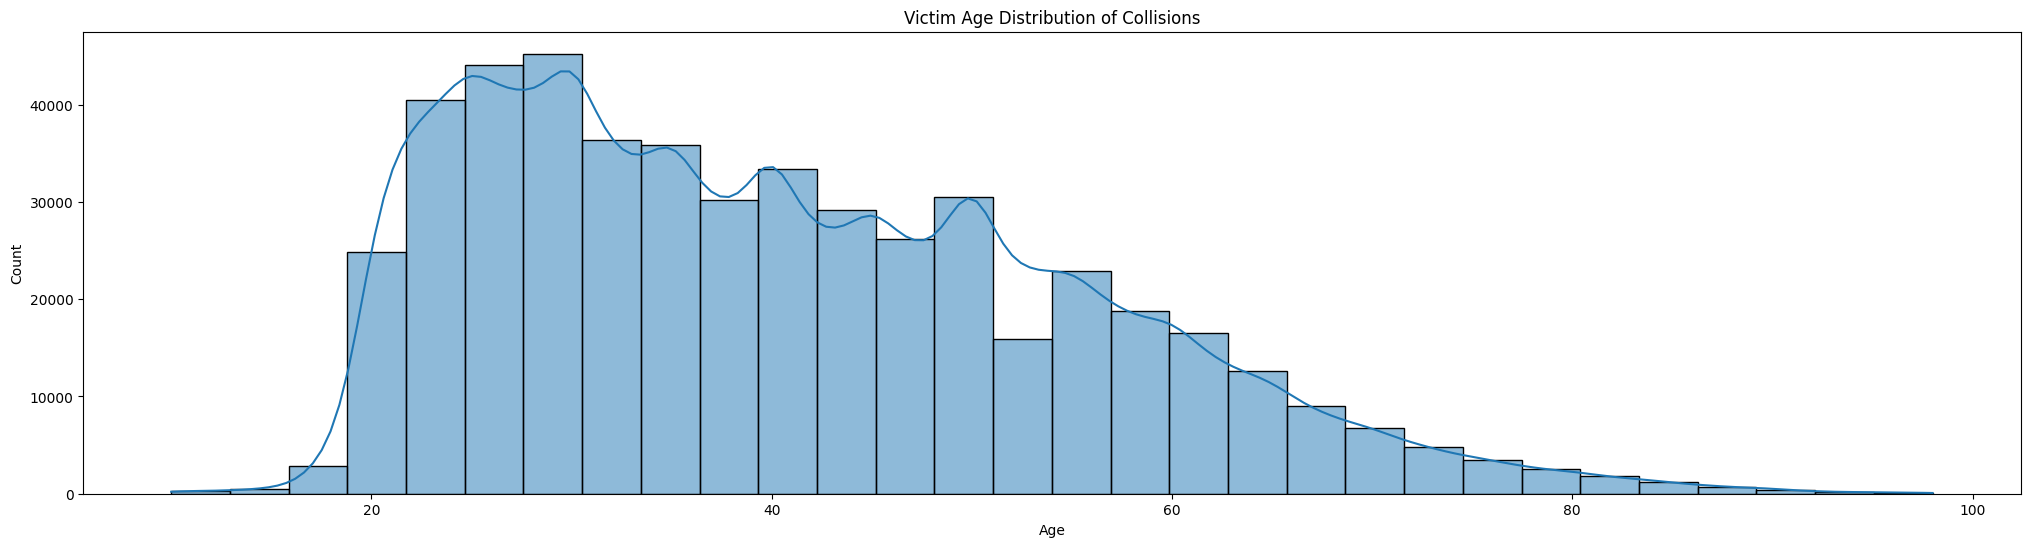

In [ ]:
# Explore the distribution of 'Victim Age' using a histogram
# Sort the 'Victim Age' column in ascending order
sorted_age = df['Victim Age'].sort_values()
plt.figure(figsize=(25, 6))
sns.histplot(sorted_age, bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Victim Age Distribution of Collisions')
plt.show()

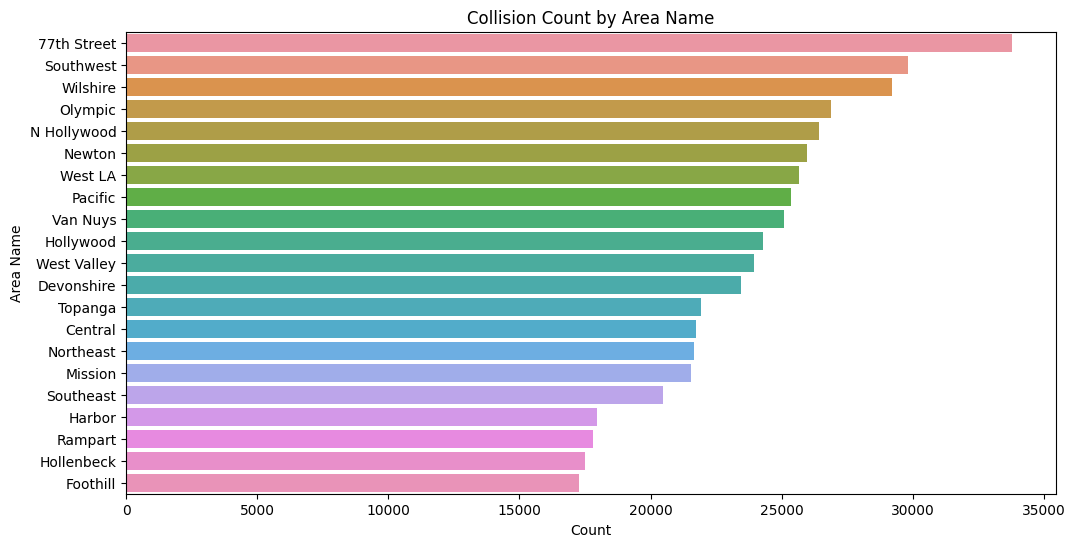

In [ ]:
# Explore the count of collisions based on 'Area Name'
plt.figure(figsize=(12, 6))
sns.countplot(y='Area Name', data=df, order=df['Area Name'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Area Name')
plt.title('Collision Count by Area Name')
plt.show()

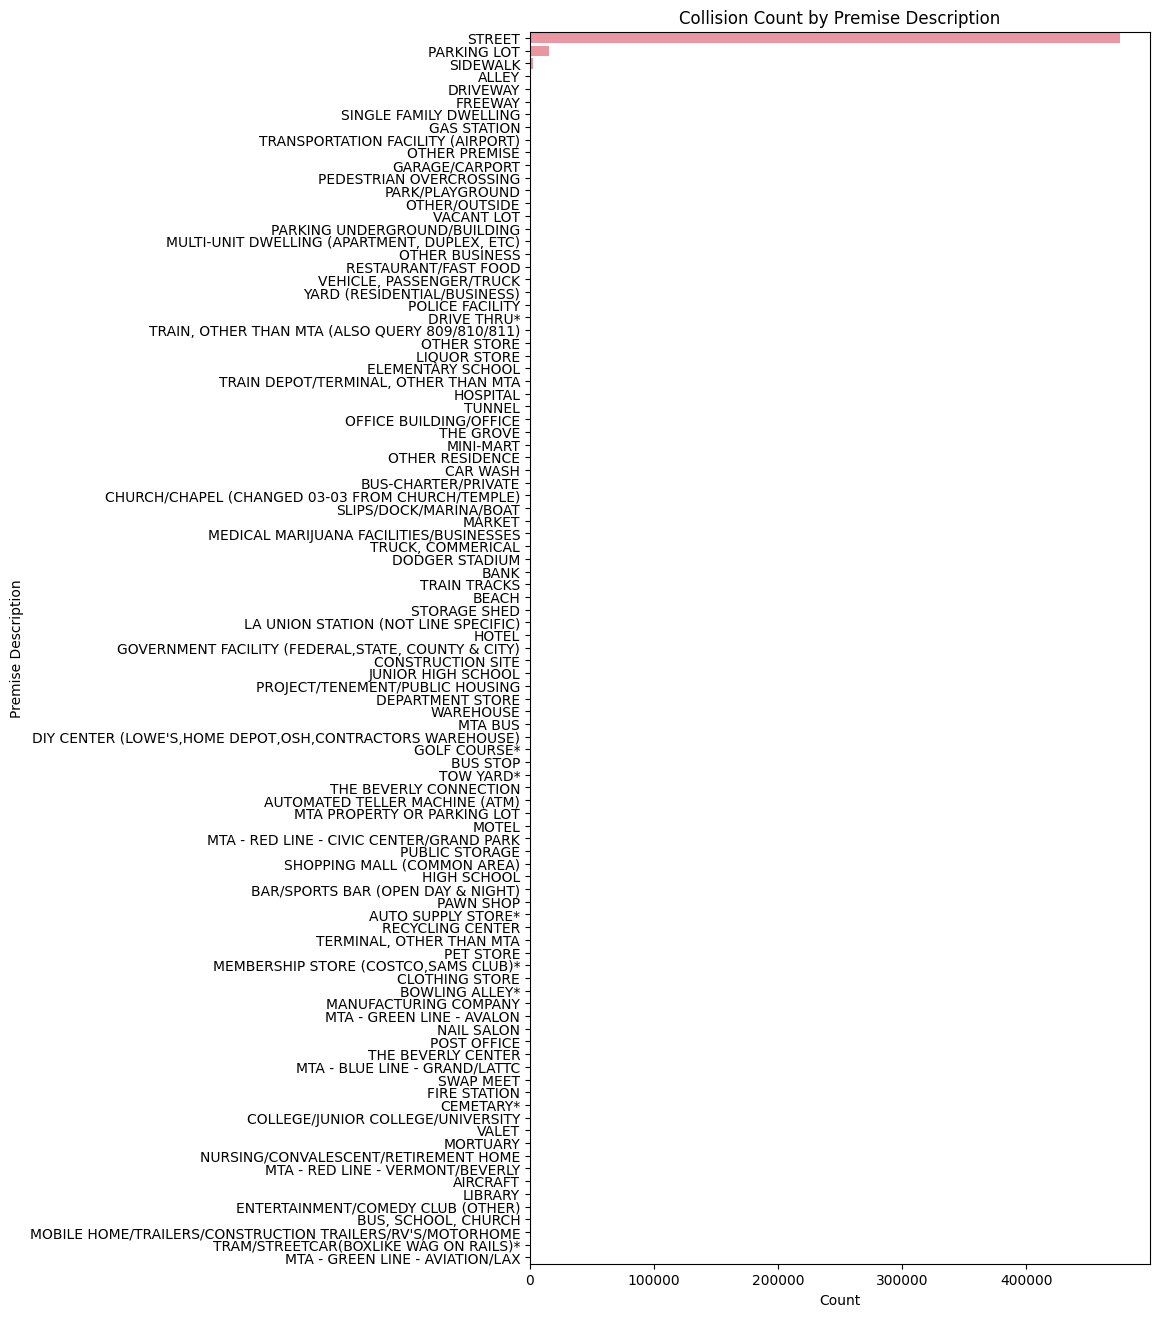

In [ ]:
# Explore the count of collisions based on 'Premise Description'
plt.figure(figsize=(8, 16))
sns.countplot(y='Premise Description', data=df, order=df['Premise Description'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Premise Description')
plt.title('Collision Count by Premise Description')
plt.show()

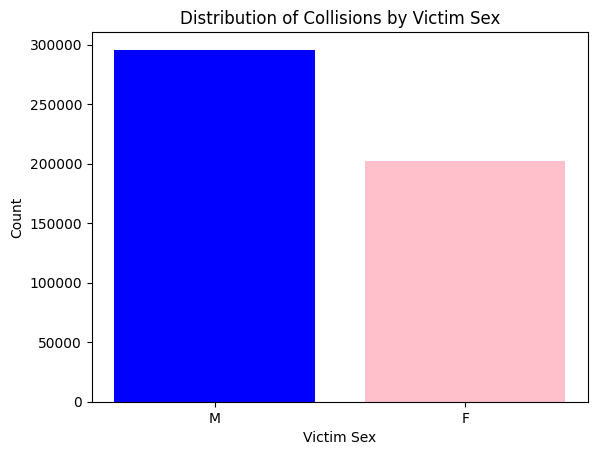

In [ ]:
# Count the occurrences of each Victim Sex category
sex_counts = df['Victim Sex'].value_counts()

# Plot the bar chart
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])

# Add labels and title
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.title('Distribution of Collisions by Victim Sex')

# Show the plot
plt.show()

In [ ]:
# Columns rejected by pandas profile: 'Crime_Code' and 'Crime_Code_Description'
# They contain the single values: 997, and TRAFFIC COLLISION

df_new = df.drop(columns=[
                      'DR Number',
                      'Crime Code',  # Uniform
                      'Crime Code Description',
                      'Date Reported',
                      'Date Occurred',
                      'Time Occurred',
                      'Premise Description',
                      'Address',
                      'Cross Street',
                      'Area Name',
                      'Reporting District'
                     ])
print(df_new.shape)
df_new.head()

(497699, 13)


Area ID                            MO Codes  Victim Age Victim Sex  \
0        3            3036 3004 3026 3101 4003        22.0          M   
1        3  3037 3006 3028 3030 3039 3101 4003        30.0          F   
3        1       0605 3101 3401 3701 3011 3034        21.0          M   
4        3       0605 4025 3037 3004 3025 3101        49.0          M   
5        4       3101 3401 3701 3003 3025 3029        60.0          M   

  Victim Descent  Premise Code              Location  Year  Month  Day  Week  \
0              H         101.0  (34.0255, -118.3002)  2019      8   24    34   
1              H         101.0  (34.0256, -118.3089)  2019      8   30    35   
3              H         101.0  (34.0492, -118.2391)  2019     11   20    47   
4              B         101.0  (34.0108, -118.3182)  2019      8   30    35   
5              H         101.0   (34.066, -118.2102)  2019      7    6    27   

   Weekday  Hour  
0        5     4  
1        4    23  
3        2     3  
4        4    21  
5        5     9

In [ ]:
df_new = df_new[df_new['MO Codes'].notna()]
lst = []
for elem in df_new['MO Codes']:
    lst.append(elem.split(' '))
df_new['MO Codes'] = lst
df = df_new

In [ ]:
df_new

Area ID                                           MO Codes  \
0             3                     [3036, 3004, 3026, 3101, 4003]   
1             3         [3037, 3006, 3028, 3030, 3039, 3101, 4003]   
3             1               [0605, 3101, 3401, 3701, 3011, 3034]   
4             3               [0605, 4025, 3037, 3004, 3025, 3101]   
5             4               [3101, 3401, 3701, 3003, 3025, 3029]   
...         ...                                                ...   
599473        7  [3004, 3024, 3029, 3035, 3037, 3101, 3401, 370...   
599474        8  [3003, 3026, 3029, 3035, 3036, 3101, 3401, 370...   
599475       15               [3004, 3026, 4015, 3029, 3036, 3101]   
599476       16               [3004, 3028, 4026, 3034, 3037, 3101]   
599477       21               [3006, 3028, 4026, 3034, 3037, 3101]   

        Victim Age Victim Sex Victim Descent  Premise Code  \
0             22.0          M              H         101.0   
1             30.0          F              H         101.0   
3             21.0          M              H         101.0   
4             49.0          M              B         101.0   
5             60.0          M              H         101.0   
...            ...        ...            ...           ...   
599473        20.0          F              W         101.0   
599474        31.0          M              H         101.0   
599475        43.0          F              O         101.0   
599476        50.0          M              H         101.0   
599477        50.0          M              W         101.0   

                    Location  Year  Month  Day  Week  Weekday  Hour  
0       (34.0255, -118.3002)  2019      8   24    34        5     4  
1       (34.0256, -118.3089)  2019      8   30    35        4    23  
3       (34.0492, -118.2391)  2019     11   20    47        2     3  
4       (34.0108, -118.3182)  2019      8   30    35        4    21  
5        (34.066, -118.2102)  2019      7    6    27        5     9  
...                      ...   ...    ...  ...   ...      ...   ...  
599473  (34.0359, -118.3495)  2023      8    6    31        6    21  
599474   (34.0403, -118.377)  2023      8    3    31        3    22  
599475   (34.194, -118.4225)  2023      8    6    31        6    16  
599476   (34.234, -118.2703)  2023      8    6    31        6    18  
599477  (34.2083, -118.5967)  2023      8    7    32        0    10  

[424258 rows x 13 columns]

In [ ]:
df[['Latitude', 'Longitude']] = df['Location'].str.strip('()').str.split(', ', expand=True)
# Convert the columns to numeric if needed
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
# replaces 0 values with the mean latitude and longitude values, respectively.
df['Latitude'] = df['Latitude'].replace(0, df['Latitude'].mean())
df['Longitude'] = df['Longitude'].replace(0, df['Longitude'].mean())
df = df.drop(columns=['Location'])
df.head()

Area ID                                    MO Codes  Victim Age Victim Sex  \
0        3              [3036, 3004, 3026, 3101, 4003]        22.0          M   
1        3  [3037, 3006, 3028, 3030, 3039, 3101, 4003]        30.0          F   
3        1        [0605, 3101, 3401, 3701, 3011, 3034]        21.0          M   
4        3        [0605, 4025, 3037, 3004, 3025, 3101]        49.0          M   
5        4        [3101, 3401, 3701, 3003, 3025, 3029]        60.0          M   

  Victim Descent  Premise Code  Year  Month  Day  Week  Weekday  Hour  \
0              H         101.0  2019      8   24    34        5     4   
1              H         101.0  2019      8   30    35        4    23   
3              H         101.0  2019     11   20    47        2     3   
4              B         101.0  2019      8   30    35        4    21   
5              H         101.0  2019      7    6    27        5     9   

   Latitude  Longitude  
0   34.0255  -118.3002  
1   34.0256  -118.3089  
3   34.0492  -118.2391  
4   34.0108  -118.3182  
5   34.0660  -118.2102

In [ ]:
# Split the features into 80% training and 20% testing
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


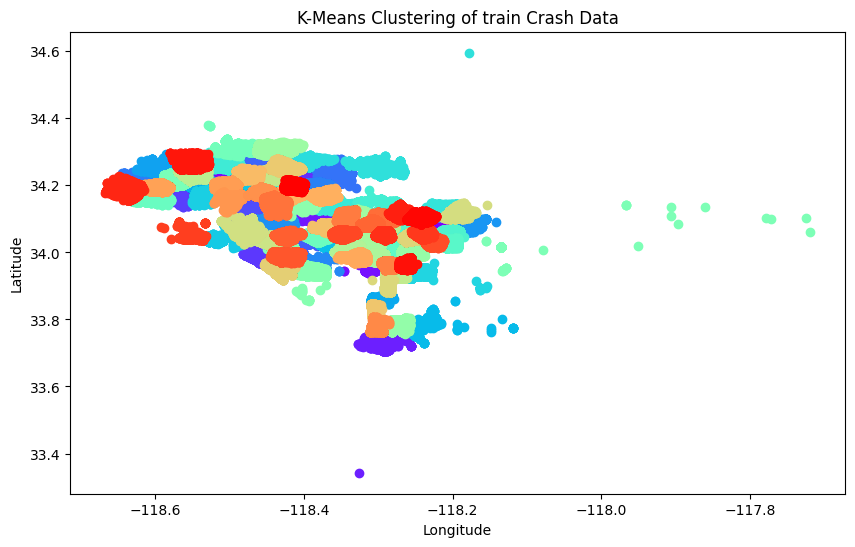

In [ ]:
# Define the number of clusters (k)
k = 100

# Perform clustering on the imputed data
kmeans = KMeans(n_clusters=k, random_state=42)

# Add a new feature for cluster labels
df_train['Cluster'] = kmeans.fit_predict(df_train[['Longitude', 'Latitude']])

# Get cluster centers and number of clusters
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)

# Define a colormap for clusters
colors = plt.cm.rainbow(np.linspace(0, 1, k))

# Plot the clusters on a scatter plot with legend labels containing cluster numbers and relative probabilities
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = df_train[df_train['Cluster'] == i]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                c=[colors[i]], label=f'Cluster {i}')

plt.title('K-Means Clustering of train Crash Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Create a folium map centered at an average location within the crash data
map_center = [df_train['Latitude'].mean(), df_train['Longitude'].mean()]

# Get latitude and longitude boundaries for Los Angeles
la_bounds = [(34.0522, -118.2437), (34.1895, -118.1245)]  # Southwest and Northeast coordinates of Los Angeles

m = folium.Map(location=[34.0522, -118.2437], zoom_start=13)  # Set initial map center and zoom level

# Add heatmap layer to the map within Los Angeles boundaries
crash_data = df_train[['Latitude', 'Longitude']].values.tolist()
HeatMap(crash_data, radius=15, blur=10, min_opacity=0.5, max_zoom=20, max_val=1.0).add_to(m)

# Set map boundaries to limit the view to Los Angeles
m.fit_bounds(la_bounds)

# Display the map in the Colab notebook
m

<ipython-input-21-ffe1cc4cb988>:11: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(crash_data, radius=15, blur=10, min_opacity=0.5, max_zoom=20, max_val=1.0).add_to(m)


In [ ]:
df_train = df_train.drop(columns=['Longitude','Latitude'])

# Add a new feature for cluster labels
df_test['Cluster'] = kmeans.fit_predict(df_test[['Longitude', 'Latitude']])

df_test = df_test.drop(columns=['Longitude','Latitude'])

target = 'Victim Sex'
X_train = df_train.drop(columns=target)
y_train = df_train[target]
X_val = df_test.drop(columns=target)
y_val = df_test[target]

X_train['MO Codes'] = X_train['MO Codes'].apply(lambda x: '_'.join(map(str, x)))
X_val['MO Codes'] = X_val['MO Codes'].apply(lambda x: '_'.join(map(str, x)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pipeline_lr = make_pipeline(ce.OrdinalEncoder(),
                           SimpleImputer(strategy='median'),
                           StandardScaler(),
                           LogisticRegressionCV(cv=10)
                           )
pipeline_lr.fit(X_train, y_train)
print('Validation Accuracy:', pipeline_lr.score(X_val, y_val))

Validation Accuracy: 0.598053080658087


In [ ]:
y_train = y_train.map({'F': 0, 'M': 1})
y_val = y_val.map({'F': 0, 'M': 1})
pipeline_xgb = make_pipeline(ce.OrdinalEncoder(),
                             XGBClassifier(n_estimators=100,
                                           random_state=42,
                                           n_jobs=-1)

                        )
print(y_train)
pipeline_xgb.fit(X_train, y_train)
print('Validation Accuracy:', pipeline_xgb.score(X_val, y_val))

326258    0
233963    1
324307    1
297636    1
101043    1
         ..
395843    1
527767    0
235771    1
255098    1
222314    1
Name: Victim Sex, Length: 339406, dtype: int64
Validation Accuracy: 0.597440248903974


In [ ]:
# Creating a pipeline utilizing RandomForeestClassifier

# Validation accuracy increased with the inclussion of max_depth, and
# min_samples_leaf param

pipeline_rf = make_pipeline(ce.OrdinalEncoder(),
                         SimpleImputer(strategy='mean'),
                         RandomForestClassifier(n_estimators=200,
                                                max_depth=12,
                                                min_samples_leaf=5,
                                                random_state=42,
                                                n_jobs=-1 )
                           )

pipeline_rf.fit(X_train, y_train)
print('Validation Accuracy', pipeline_rf.score(X_val, y_val))

Validation Accuracy 0.6028496676566256


<ipython-input-26-963c7b863ddc>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr()


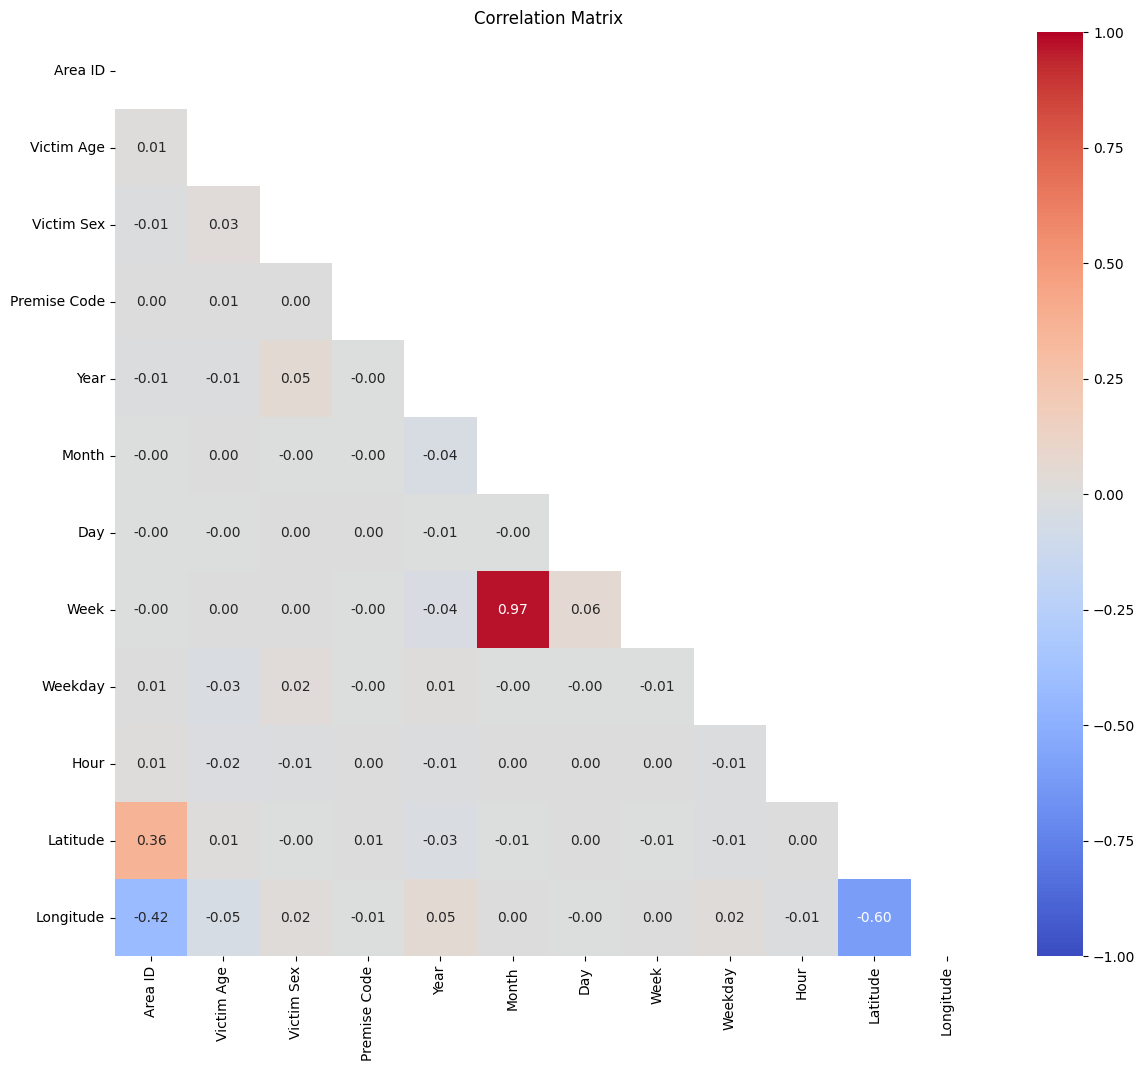

In [ ]:
# Assuming your dataframe is named 'df'
df_corr = df
# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
df_corr['Victim Sex'] = label_encoder.fit_transform(df_corr['Victim Sex'])
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
correlation_matrix = df_corr.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the seaborn heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)

# Customize the plot
plt.title("Correlation Matrix")
plt.show()

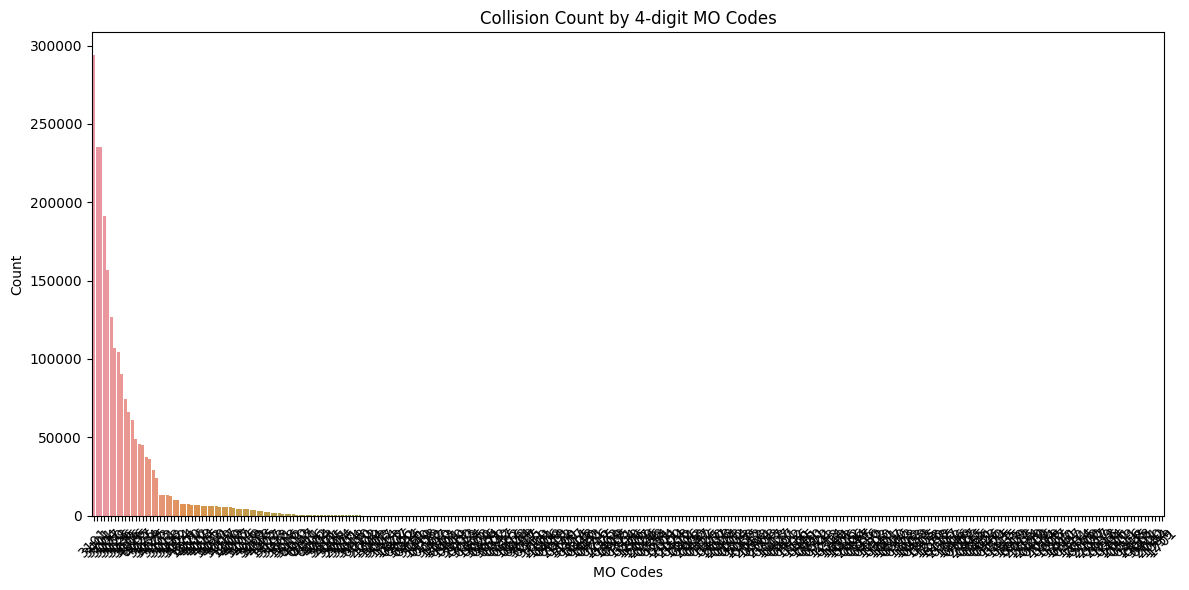

In [ ]:
# Flatten the lists of MO Codes into separate rows for each incident
mocodes_flat = ' '.join(df_train['MO Codes'].apply(lambda x: ' '.join(map(str, x)) if x else '').astype(str)).split()

# Create a DataFrame with flattened MO Codes
mocodes_df = pd.DataFrame({'MO Codes': mocodes_flat})

# Filter out non-numeric MO Codes (considering only 4-digit codes)
mocodes_df = mocodes_df[mocodes_df['MO Codes'].str.isnumeric() & (mocodes_df['MO Codes'].str.len() == 4)]

# Plot the counts of unique 4-digit MO Codes
plt.figure(figsize=(12, 6))
sns.countplot(x='MO Codes', data=mocodes_df, order=mocodes_df['MO Codes'].value_counts().index)
plt.xlabel('MO Codes')
plt.ylabel('Count')
plt.title('Collision Count by 4-digit MO Codes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
mocodes_df['MO Codes'].value_counts()

3101    293723
3401    235120
3701    235031
3004    191173
3037    156746
         ...  
2020         1
2032         1
1004         1
1259         1
1701         1
Name: MO Codes, Length: 306, dtype: int64

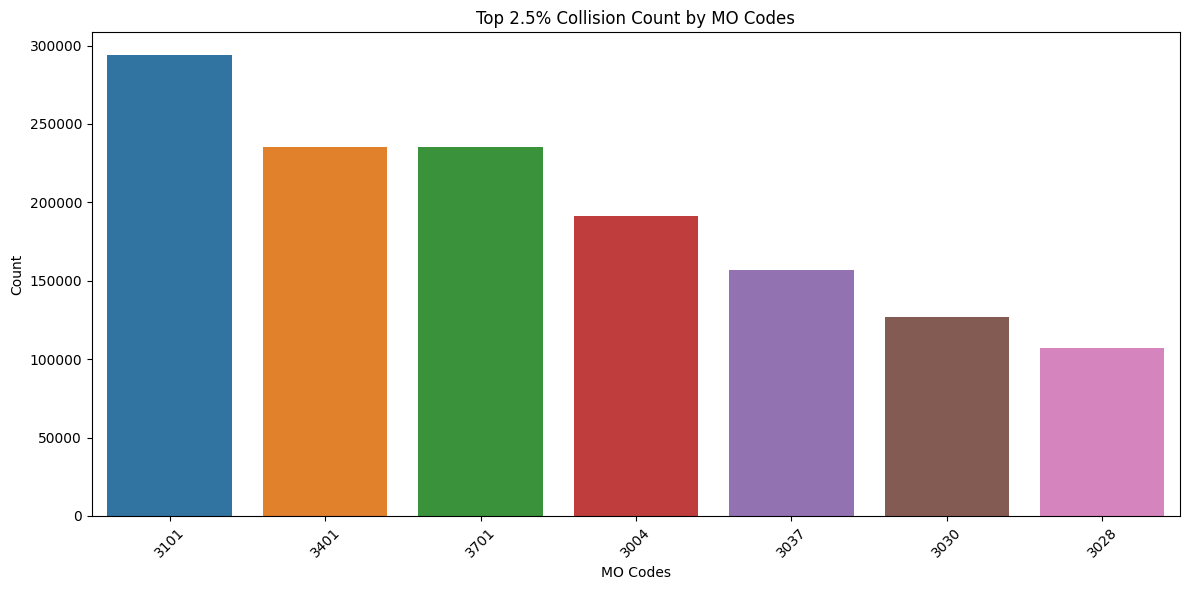

In [ ]:

# Flatten the lists of MO Codes into separate rows for each incident
mocodes_flat = ' '.join(df_train['MO Codes'].apply(lambda x: ' '.join(map(str, x)) if x else '').astype(str)).split()

# Create a DataFrame with flattened MO Codes
mocodes_df = pd.DataFrame({'MO Codes': mocodes_flat})

# Filter out non-numeric MO Codes (considering only 4-digit codes)
mocodes_df = mocodes_df[mocodes_df['MO Codes'].str.isnumeric() & (mocodes_df['MO Codes'].str.len() == 4)]

# Calculate the percentage threshold for MO codes to keep
percentage_threshold = 0.025  # You can adjust this percentage based on your preference

# Calculate the count threshold based on the percentage
count_threshold = int(percentage_threshold * len(mocodes_df['MO Codes'].unique()))

# Get the top MO codes to keep
top_mocodes = mocodes_df['MO Codes'].value_counts().head(count_threshold).index

# Filter the dataframe to keep only the rows with top MO codes
df_train_top_mocodes = mocodes_df[mocodes_df['MO Codes'].isin(top_mocodes)]

# Plot the counts of unique MO Codes
plt.figure(figsize=(12, 6))
sns.countplot(x='MO Codes', data=df_train_top_mocodes, order=df_train_top_mocodes['MO Codes'].value_counts().index)
plt.xlabel('MO Codes')
plt.ylabel('Count')
plt.title(f'Top {percentage_threshold * 100}% Collision Count by MO Codes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def filter_top_mocodes(mocodes_list, top_mocodes):
    return [code for code in mocodes_list if code in top_mocodes]

# Assuming df_test_top_mocodes contains the top MO codes
top_mocodes = df_train_top_mocodes['MO Codes'].unique()

df_train_mo_top = df_train
# Apply the function to filter out non-top MO codes in the 'MO Codes' column of the test data
df_train_mo_top['MO Codes'] = df_train['MO Codes'].apply(lambda x: filter_top_mocodes(x, top_mocodes))

# Display the updated DataFrame
df_train_mo_top.head()


Area ID                  MO Codes  Victim Age Victim Sex  \
326258       15  [3004, 3101, 3401, 3701]        25.0          F   
233963       15  [3030, 3101, 3401, 3701]        37.0          M   
324307       14  [3037, 3101, 3401, 3701]        77.0          M   
297636        2  [3101, 3401, 3701, 3004]        23.0          M   
101043       18              [3037, 3101]        70.0          M   

       Victim Descent  Premise Code  Year  Month  Day  Week  Weekday  Hour  \
326258              W         101.0  2014      5    7    19        2     6   
233963              O         101.0  2012      6   20    25        2    17   
324307              B         101.0  2014     12   29     1        0    16   
297636              H         101.0  2014     11    8    45        5    22   
101043              H         101.0  2020     11   16    47        0    17   

        Cluster  
326258       99  
233963       36  
324307       50  
297636       60  
101043       67

In [ ]:
# Count the number of rows with empty 'MO Codes'
empty_mo_codes_count = df_train_mo_top[df_train_mo_top['MO Codes'].apply(len) == 0].shape[0]

# Print the count
print(f"Number of rows with empty 'MO Codes': {empty_mo_codes_count}")

# Count the number of rows with empty 'MO Codes'
non_empty_mo_codes_count = df_train_mo_top[df_train_mo_top['MO Codes'].apply(len) != 0].shape[0]

# Print the count
print(f"Number of rows with non-empty 'MO Codes': {non_empty_mo_codes_count}")

# Discard rows with empty 'MO Codes'
df_train_mo_top = df_train_mo_top[df_train_mo_top['MO Codes'].apply(len) > 0]


Number of rows with empty 'MO Codes': 19051
Number of rows with non-empty 'MO Codes': 320355


In [ ]:
df_test_mo_top = df_test
# Apply the function to filter out non-top MO codes in the 'MO Codes' column of the test data
df_test_mo_top['MO Codes'] = df_test['MO Codes'].apply(lambda x: filter_top_mocodes(x, top_mocodes))

# Display the updated DataFrame
df_test_mo_top.head()

# Count the number of rows with empty 'MO Codes'
empty_mo_codes_count = df_test_mo_top[df_test_mo_top['MO Codes'].apply(len) == 0].shape[0]

# Print the count
print(f"Number of rows with empty 'MO Codes': {empty_mo_codes_count}")

# Count the number of rows with empty 'MO Codes'
non_empty_mo_codes_count = df_test_mo_top[df_test_mo_top['MO Codes'].apply(len) != 0].shape[0]

# Print the count
print(f"Number of rows with non-empty 'MO Codes': {non_empty_mo_codes_count}")

# Discard rows with empty 'MO Codes'
df_test_mo_top = df_test_mo_top[df_test_mo_top['MO Codes'].apply(len) > 0]

Number of rows with empty 'MO Codes': 4759
Number of rows with non-empty 'MO Codes': 80093


In [ ]:
df_test_mo_top

Area ID                              MO Codes  Victim Age Victim Sex  \
93171         6                    [3101, 3401, 3701]        13.0          F   
106826       20        [3004, 3037, 3101, 3401, 3701]        38.0          M   
557223       20        [3004, 3037, 3101, 3401, 3701]        35.0          F   
449714        1                    [3101, 3401, 3701]        44.0          M   
41076        12                    [3037, 3004, 3101]        37.0          M   
...         ...                                   ...         ...        ...   
6655          7  [3028, 3030, 3037, 3101, 3401, 3701]        42.0          F   
287740       19              [3004, 3101, 3401, 3701]        22.0          M   
283745       17              [3037, 3101, 3401, 3701]        26.0          M   
507898        2              [3101, 3401, 3701, 3004]        22.0          M   
439063       18                    [3101, 3037, 3004]        25.0          M   

       Victim Descent  Premise Code  Year  Month  Day  Week  Weekday  Hour  \
93171               H         101.0  2021     10   29    43        4    16   
106826              H         101.0  2021     11   22    47        0    13   
557223              H         101.0  2018      5    6    18        6    23   
449714              F         101.0  2017      9    3    35        6     1   
41076               H         101.0  2020      1   16     3        3    14   
...               ...           ...   ...    ...  ...   ...      ...   ...   
6655                W         101.0  2019      9   26    39        3     8   
287740              H         101.0  2013      4   28    17        6     2   
283745              W         101.0  2013      3   25    13        0    18   
507898              H         101.0  2018      6   22    25        4    23   
439063              H         101.0  2016      9   29    39        3    13   

        Cluster  
93171        18  
106826        2  
557223        2  
449714       19  
41076         8  
...         ...  
6655         37  
287740       53  
283745       90  
507898       87  
439063       95  

[80093 rows x 13 columns]

In [ ]:
target = 'MO Codes'
y_train = df_train_mo_top[target]
X_train = df_train_mo_top.drop(columns=target)

y_test = df_test_mo_top[target]
X_test = df_test_mo_top.drop(columns=target)

In [ ]:
X_test['Victim Descent'].unique()

array(['H', 'F', 'B', 'W', 'O', 'A', 'X', nan, 'K', 'C', 'V', 'J', 'Z',
       'D', 'I', 'U', 'P', 'G', 'S'], dtype=object)

In [ ]:
# Convert 'Victim Sex' and 'Victim Descent' to numerical values using LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_descent = LabelEncoder()

# Handle 'nan' and '-' in 'Victim Descent'
X_train['Victim Sex'] = label_encoder_sex.fit_transform(X_train['Victim Sex'])
X_train['Victim Descent'] = label_encoder_descent.fit_transform(X_train['Victim Descent'].astype(str).replace(['nan', '-'], 'unknown'))

X_test['Victim Sex'] = label_encoder_sex.transform(X_test['Victim Sex'])
X_test['Victim Descent'] = label_encoder_descent.transform(X_test['Victim Descent'].astype(str).replace(['nan', '-'], 'unknown'))

# Use SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Assuming y_train and y_valid are your target variables in list format
mlb = MultiLabelBinarizer()

# Transform the target variables into a binary matrix
y_train_matrix = mlb.fit_transform(y_train)
y_test_matrix = mlb.transform(y_test)

# The variable y_pred_matrix now contains the predicted MO codes for the test set


In [ ]:
X_train_cnn = X_train.drop(columns=[
                      'Year',
                      'Month',  # Uniform
                      'Weekday',
                      'Victim Descent',
                      'Victim Sex',
                      'Premise Code'
                     ])
X_test_cnn = X_test.drop(columns=[
                      'Year',
                      'Month',  # Uniform
                      'Weekday',
                      'Victim Descent',
                      'Victim Sex',
                      'Premise Code'
                     ])

# Assuming y_train_matrix.shape[1] is the number of classes (7 in your case)
output_neurons = y_train_matrix.shape[1]

# Build a more complex neural network model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_cnn.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(output_neurons, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(X_train_cnn, y_train_matrix, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the validation set
y_pred_prob = model.predict(X_test_cnn)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

# Convert predictions back to original labels
y_pred_labels = mlb.inverse_transform(y_pred_nn)

# Evaluate the model
accuracy = accuracy_score(y_test_matrix, y_pred_nn)
print(f'Accuracy: {accuracy}')

# Print detailed classification report
print(classification_report(y_test_matrix, y_pred_nn))

Epoch 1/10
8009/8009 [==============================] - 18s 2ms/step - loss: 145088512.0000 - accuracy: 0.1228 - val_loss: 500598688.0000 - val_accuracy: 0.5977
Epoch 2/10
8009/8009 [==============================] - 17s 2ms/step - loss: 1417217920.0000 - accuracy: 0.1243 - val_loss: 1975971200.0000 - val_accuracy: 0.0023
Epoch 3/10
8009/8009 [==============================] - 17s 2ms/step - loss: 4740644864.0000 - accuracy: 0.1267 - val_loss: 4148962048.0000 - val_accuracy: 0.5977
Epoch 4/10
8009/8009 [==============================] - 17s 2ms/step - loss: 11094988800.0000 - accuracy: 0.1252 - val_loss: 7203109376.0000 - val_accuracy: 0.0965
Epoch 5/10
8009/8009 [==============================] - 17s 2ms/step - loss: 21840640000.0000 - accuracy: 0.1247 - val_loss: 33070174208.0000 - val_accuracy: 0.1578
Epoch 6/10
8009/8009 [==============================] - 17s 2ms/step - loss: 35710357504.0000 - accuracy: 0.1260 - val_loss: 53604249600.0000 - val_accuracy: 3.1215e-05
Epoch 7/10
8009

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_nn = (y_pred_prob > 0.7).astype(int)

# Convert predictions back to original labels
y_pred_labels = mlb.inverse_transform(y_pred_nn)

# Evaluate the model
accuracy = accuracy_score(y_test_matrix, y_pred_nn)
print(f'Accuracy: {accuracy}')

# Print detailed classification report
print(classification_report(y_test_matrix, y_pred_nn))

Accuracy: 0.002447155182100808
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     48252
           1       0.34      1.00      0.50     26897
           2       0.00      0.00      0.00     31883
           3       0.00      0.00      0.00     39128
           4       0.00      0.00      0.00     73489
           5       0.00      0.00      0.00     58587
           6       0.00      0.00      0.00     58601

   micro avg       0.34      0.08      0.13    336837
   macro avg       0.05      0.14      0.07    336837
weighted avg       0.03      0.08      0.04    336837
 samples avg       0.34      0.07      0.12    336837



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Build and train a multi-output classifier (RandomForest)
classifier = RandomForestClassifier(random_state=42)
model = MultiOutputClassifier(classifier)

# Train the model
model.fit(X_train, y_train_matrix)

# Predict on the validation set
y_pred_matrix = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_matrix, y_pred_matrix)
print(f'Accuracy: {accuracy}')

# Print detailed classification report
print(classification_report(y_test_matrix, y_pred_matrix))


Accuracy: 0.20926922452648797
              precision    recall  f1-score   support

           0       0.66      0.83      0.74     48252
           1       0.59      0.35      0.44     26897
           2       0.55      0.26      0.35     31883
           3       0.68      0.84      0.75     39128
           4       0.93      0.99      0.96     73489
           5       0.94      0.99      0.96     58587
           6       0.94      0.99      0.96     58601

   micro avg       0.82      0.83      0.82    336837
   macro avg       0.75      0.75      0.74    336837
weighted avg       0.80      0.83      0.81    336837
 samples avg       0.81      0.84      0.80    336837



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


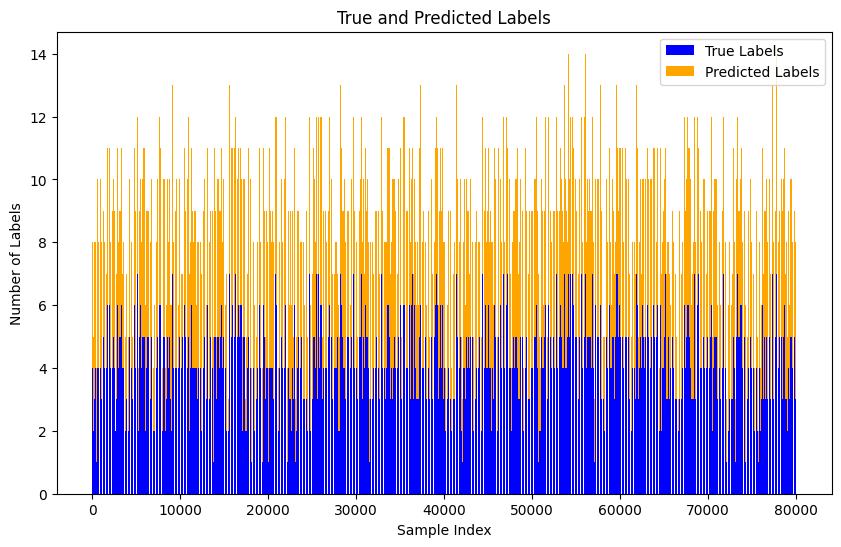

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot true labels
ax.bar(np.arange(len(y_test_matrix)), y_test_matrix.sum(axis=1), label='True Labels', color='blue')

# Plot predicted labels (stacked on top of true labels)
ax.bar(np.arange(len(y_pred_matrix)), y_pred_matrix.sum(axis=1), label='Predicted Labels', bottom=y_test_matrix.sum(axis=1), color='orange')

# Customize the plot
ax.set_xlabel('Sample Index')
ax.set_ylabel('Number of Labels')
ax.set_title('True and Predicted Labels')
ax.legend()

# Show the plot
plt.show()

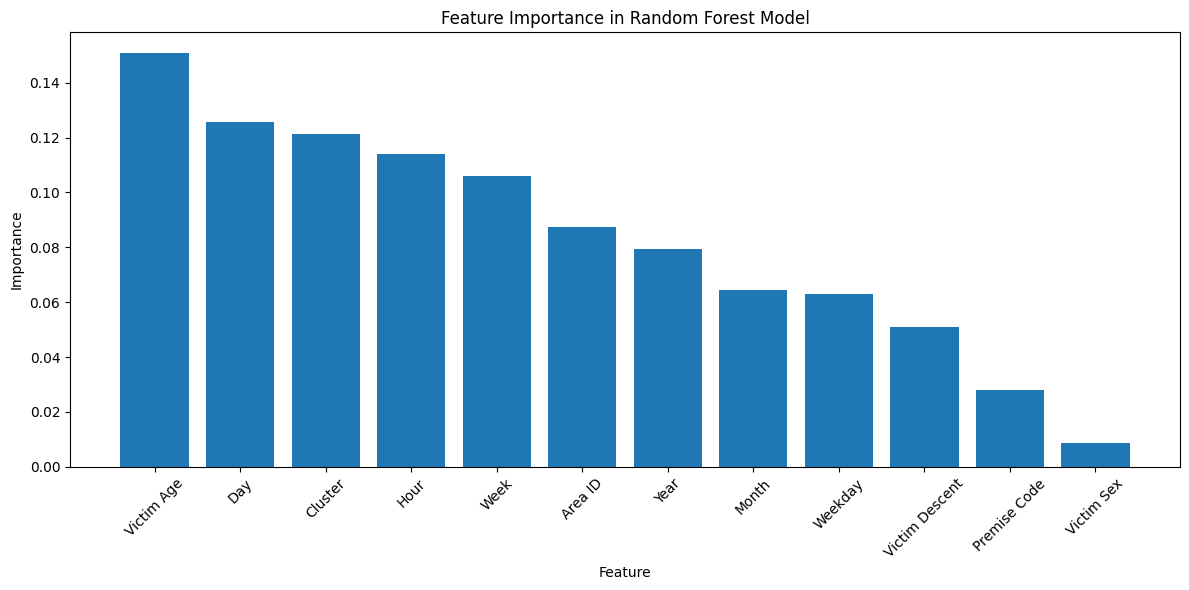

In [ ]:
# Get feature importances from the trained model
feature_importances = model.estimators_[0].feature_importances_

# Assuming your features are in X_train.columns
feature_names = X_train.columns

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier

# Build and train XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_model = MultiOutputClassifier(xgb_classifier)

# Train the model
xgb_model.fit(X_train, y_train_matrix)

# Predict on the validation set
y_pred_matrix_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_matrix, y_pred_matrix_xgb)
print(f'Accuracy: {accuracy}')

# Print detailed classification report
print(classification_report(y_test_matrix, y_pred_matrix_xgb))

Accuracy: 0.2311937372804115
              precision    recall  f1-score   support

           0       0.66      0.88      0.76     48252
           1       0.62      0.39      0.48     26897
           2       0.61      0.23      0.33     31883
           3       0.67      0.90      0.77     39128
           4       0.93      0.99      0.96     73489
           5       0.98      1.00      0.99     58587
           6       0.98      1.00      0.99     58601

   micro avg       0.83      0.85      0.84    336837
   macro avg       0.78      0.77      0.75    336837
weighted avg       0.82      0.85      0.82    336837
 samples avg       0.83      0.86      0.82    336837



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
max_features = 10
n_estimators_value = 2000
min_samples_leaf_value = 10

# Build and train GradientBoostingClassifier classifier
gbc_classifier = GradientBoostingClassifier(random_state=42,min_samples_leaf=min_samples_leaf_value,max_features=max_features)
gbc_model = MultiOutputClassifier(gbc_classifier)

# Train the model
gbc_model.fit(X_train, y_train_matrix)

# Predict on the validation set
y_pred_matrix_gbc = gbc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_matrix, y_pred_matrix_gbc)
print(f'Accuracy: {accuracy}')

# Print detailed classification report
print(classification_report(y_test_matrix, y_pred_matrix_gbc))

Accuracy: 0.23682469129636796
              precision    recall  f1-score   support

           0       0.65      0.90      0.76     48252
           1       0.67      0.23      0.34     26897
           2       0.67      0.16      0.25     31883
           3       0.68      0.88      0.76     39128
           4       0.92      1.00      0.96     73489
           5       0.97      0.99      0.98     58587
           6       0.97      1.00      0.99     58601

   micro avg       0.84      0.83      0.83    336837
   macro avg       0.79      0.74      0.72    336837
weighted avg       0.83      0.83      0.80    336837
 samples avg       0.83      0.84      0.82    336837



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
